In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc

In [13]:
data = pd.read_csv('ArizonaExcelData.csv')
data = data[['DATE', 'LOCATION', 'OPPONENT', 'RESULT', 'AZSCORE', 'AWAYSCORE', 'LINE', 'RECORD']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       37 non-null     object 
 1   LOCATION   37 non-null     object 
 2   OPPONENT   37 non-null     object 
 3   RESULT     37 non-null     object 
 4   AZSCORE    37 non-null     float64
 5   AWAYSCORE  37 non-null     float64
 6   LINE       37 non-null     float64
 7   RECORD     37 non-null     object 
dtypes: float64(3), object(5)
memory usage: 2.6+ KB


In [14]:
data.head()

,DATE,LOCATION,OPPONENT,RESULT,AZSCORE,AWAYSCORE,LINE,RECORD
0,Tue 11-09,H,Northern Arizona,W,81.0,52.0,70.0,1-0
1,Fri 11-12,H,UT Rio Grande Valley,W,104.0,50.0,80.0,2-0
2,Tue 11-16,H,North Dakota St.,W,97.0,45.0,71.0,3-0
3,Fri 11-19,N,Wichita St.,W,82.0,78.0,88.0,4-0
4,Sun 11-21,N,Michigan,W,80.0,62.0,71.0,5-0


In [18]:
datadum = pd.get_dummies(data=data, columns=['RESULT'])

In [35]:
datadum = datadum.dropna()

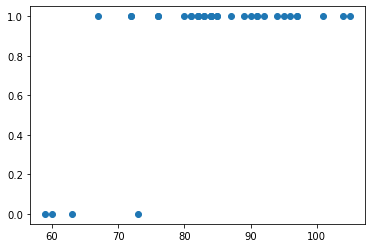

In [36]:
plt.scatter(datadum['AZSCORE'], datadum['RESULT_W'])

# Predicting Wins

In [37]:
y = datadum['RESULT_W']
X = datadum[['AZSCORE', 'AWAYSCORE']]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=10)

In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression()

In [92]:
y_pred = logreg.predict(X_test)

In [93]:
acc = accuracy_score(y_test, y_pred)
acc

0.9473684210526315

0.5


<AxesSubplot:>

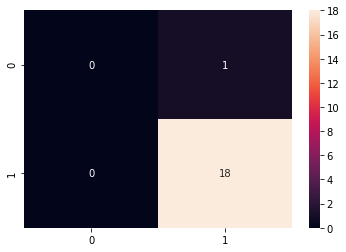

In [97]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(round(roc_auc, 2))

from sklearn.metrics import confusion_matrix
import seaborn as sns

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, fmt='d')

# Predicting Losses

In [98]:
y1 = datadum['RESULT_L']
X1 = datadum[['AZSCORE', 'AWAYSCORE']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.5, test_size=0.5, random_state=10)

logreg1 = LogisticRegression()
logreg1.fit(X_train1, y_train1)
y_pred1 = logreg1.predict(X_test1)


0.9473684210526315
0.5


<AxesSubplot:>

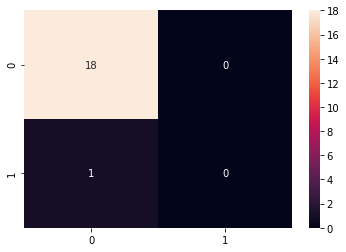

In [99]:
acc = accuracy_score(y_test, y_pred)
print(acc)

fpr1, tpr1, thresholds1 = roc_curve(y_test1, y_pred1)
roc_auc1 = auc(fpr1, tpr1)
print(round(roc_auc1, 2))

from sklearn.metrics import confusion_matrix
import seaborn as sns

cnf_matrix = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cnf_matrix, annot=True, fmt='d')